In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Metrics
import Padding

In [2]:
#############################
# Define file
#############################

file = 'newHierarchy_0_oneModel_JAM'
outputFile = '/Users/isobel/Desktop/DUNE/2024/Hierarchy/files/' + file + '.npz'

In [3]:
#############################
# Read file
#############################

print('Reading file: ', str(outputFile),', This may take a while...')

data = np.load(outputFile)

# Particle level information
run_in = data['run']
subrun_in = data['subrun']
event_in = data['event']
isNC_in = data['isNC']
nuPDG_in = data['nuPDG']
particleMask_in = data['particleMask']
pfpTruePDG_in = data['pfpTruePDG']
trueVisibleGeneration_in = data['trueVisibleGeneration']
trueVisibleParentPFPIndex_in = data['trueVisibleParentPFPIndex']
nSpacepoints_in = data['nSpacepoints']
trackShowerScore_in = data['trackShowerScore']
#trainingCutSep_in = data['trainingCutSep']
newGenPass1_in = data['new_gen_pass1']
newParentPFPIndexPass1_in = data['new_parentPFPIndex_pass1']
newGenPass2_in = data['new_gen_pass2']
newParentPFPIndexPass2_in = data['new_parentPFPIndex_pass2']
newGenPass3_in = data['new_gen_pass3']
newParentPFPIndexPass3_in = data['new_parentPFPIndex_pass3']
newGenPass4_in = data['new_gen_pass4']
newParentPFPIndexPass4_in = data['new_parentPFPIndex_pass4']
# Higher tier links
higherLinkMask_in = data['higherLinkMask']
parentPFPIndex_in = data['parentPFPIndex']
childPFPIndex_in = data['childPFPIndex']
trainingCutL_in = data['trainingCutL']
trainingCutT_in = data['trainingCutT']

nEntries = len(particleMask_in)

Reading file:  /Users/isobel/Desktop/DUNE/2024/Hierarchy/files/newHierarchy_0_oneModel_JAM.npz , This may take a while...


In [4]:
########################################
# need to create a PFPIndex array - sad.
########################################

pfpIndex = [np.array(range(0, np.count_nonzero(particleMask_in[iEvent]))) for iEvent in range(particleMask_in.shape[0])]
pfpIndex = Padding.process_array(pfpIndex, particleMask_in.shape[1])

In [5]:
########################################
# Target mask
########################################

ignore_mask = np.logical_or(nSpacepoints_in == 0, trueVisibleGeneration_in == -999)
target_mask = np.logical_and(np.logical_not(ignore_mask), particleMask_in)
primary_target_mask = np.logical_and(target_mask, trueVisibleGeneration_in == 2)
secondary_target_mask = np.logical_and(target_mask, trueVisibleGeneration_in == 3)

In [6]:
########################################
# Metrics after primary tier building
########################################

Metrics.calculateMetrics_new(nEntries, particleMask_in, nSpacepoints_in, trackShowerScore_in, trueVisibleGeneration_in, trueVisibleParentPFPIndex_in, newParentPFPIndexPass1_in, newGenPass1_in)
Metrics.calculateMetrics_leading_lepton(nEntries, particleMask_in, nSpacepoints_in, pfpTruePDG_in, trueVisibleGeneration_in, isNC_in, nuPDG_in, newGenPass1_in)


------------------------------------------------------------
TRACK
------------------------------------------------------------
NEW - True Gen   | Primary | Secondary | Tertiary | Higher |
------------------------------------------------------------
Correct parent CT |0.81     |0.0        |0.0       |0.0     |
Correct parent WT |0.0      |0.0        |0.0       |0.0     |
False primary     |0.0      |0.19       |0.07      |0.07    |
Incorrect parent  |0.0      |0.0        |0.0       |0.0     |
Not tagged        |0.19     |0.81       |0.93      |0.93    |
------------------------------------------------------------
Total             |4357     |1220       |201       |27      |
n_two_d (not included in metrics): 1
------------------------------------------------------------

------------------------------------------------------------
SHOWER
------------------------------------------------------------
NEW - True Gen   | Primary | Secondary | Tertiary | Higher |
----------------------------

In [7]:
########################################
# Metrics after later tier building - pass1
########################################

Metrics.calculateMetrics_new(nEntries, particleMask_in, nSpacepoints_in, trackShowerScore_in, trueVisibleGeneration_in, trueVisibleParentPFPIndex_in, newParentPFPIndexPass2_in, newGenPass2_in)

------------------------------------------------------------
TRACK
------------------------------------------------------------
NEW - True Gen   | Primary | Secondary | Tertiary | Higher |
------------------------------------------------------------
Correct parent CT |0.81     |0.47       |0.32      |0.0     |
Correct parent WT |0.0      |0.01       |0.11      |0.33    |
False primary     |0.0      |0.19       |0.07      |0.07    |
Incorrect parent  |0.01     |0.01       |0.04      |0.11    |
Not tagged        |0.18     |0.33       |0.46      |0.48    |
------------------------------------------------------------
Total             |4357     |1220       |201       |27      |
n_two_d (not included in metrics): 1
------------------------------------------------------------

------------------------------------------------------------
SHOWER
------------------------------------------------------------
NEW - True Gen   | Primary | Secondary | Tertiary | Higher |
----------------------------

In [8]:
########################################
# Metrics after later tier building - pass2
########################################

Metrics.calculateMetrics_new(nEntries, particleMask_in, nSpacepoints_in, trackShowerScore_in, trueVisibleGeneration_in, trueVisibleParentPFPIndex_in, newParentPFPIndexPass3_in, newGenPass3_in)

------------------------------------------------------------
TRACK
------------------------------------------------------------
NEW - True Gen   | Primary | Secondary | Tertiary | Higher |
------------------------------------------------------------
Correct parent CT |0.81     |0.51       |0.38      |0.0     |
Correct parent WT |0.0      |0.02       |0.15      |0.33    |
False primary     |0.0      |0.19       |0.07      |0.07    |
Incorrect parent  |0.04     |0.04       |0.11      |0.22    |
Not tagged        |0.15     |0.23       |0.29      |0.37    |
------------------------------------------------------------
Total             |4357     |1220       |201       |27      |
n_two_d (not included in metrics): 1
------------------------------------------------------------

------------------------------------------------------------
SHOWER
------------------------------------------------------------
NEW - True Gen   | Primary | Secondary | Tertiary | Higher |
----------------------------

In [9]:
########################################
# Final metrics
########################################

Metrics.calculateMetrics_new(nEntries, particleMask_in, nSpacepoints_in, trackShowerScore_in, trueVisibleGeneration_in, trueVisibleParentPFPIndex_in, newParentPFPIndexPass4_in, newGenPass4_in)

------------------------------------------------------------
TRACK
------------------------------------------------------------
NEW - True Gen   | Primary | Secondary | Tertiary | Higher |
------------------------------------------------------------
Correct parent CT |0.96     |0.51       |0.38      |0.0     |
Correct parent WT |0.0      |0.02       |0.15      |0.33    |
False primary     |0.0      |0.42       |0.36      |0.44    |
Incorrect parent  |0.04     |0.04       |0.11      |0.22    |
Not tagged        |0.0      |0.0        |0.0       |0.0     |
------------------------------------------------------------
Total             |4357     |1220       |201       |27      |
n_two_d (not included in metrics): 1
------------------------------------------------------------

------------------------------------------------------------
SHOWER
------------------------------------------------------------
NEW - True Gen   | Primary | Secondary | Tertiary | Higher |
----------------------------

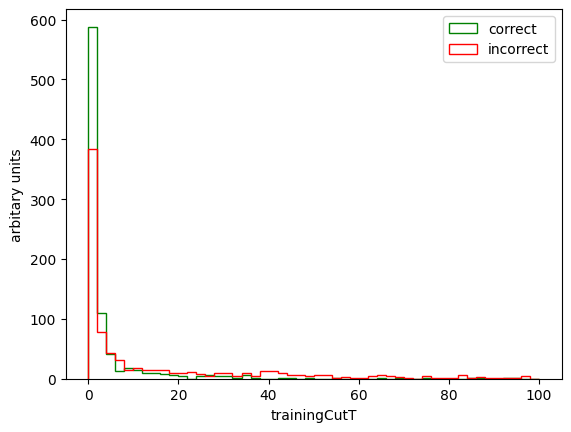

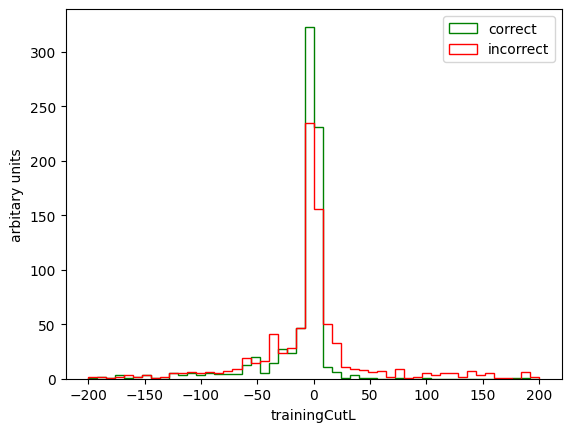

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


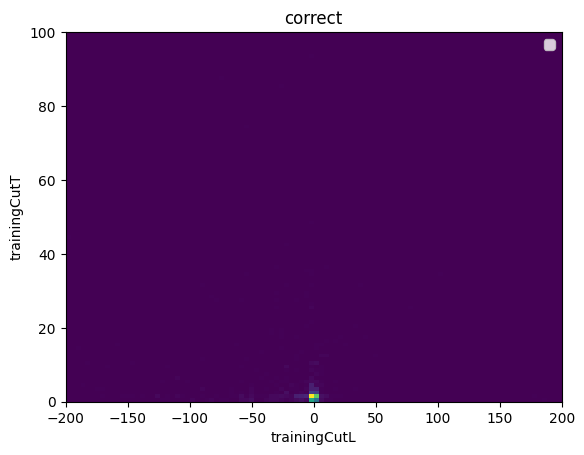

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


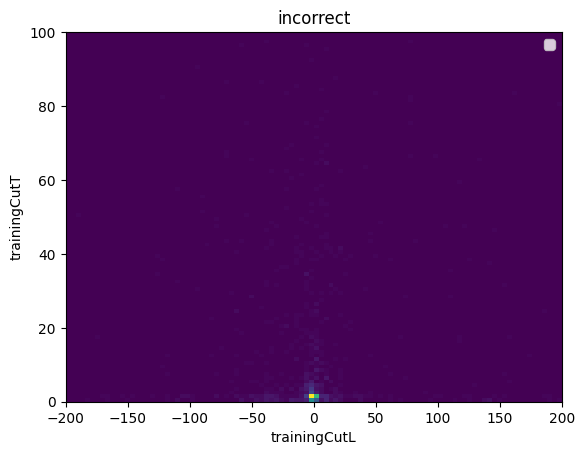

In [10]:
########################################
# Inv. trainingCuts
########################################

Metrics.InvTrainingCuts(secondary_target_mask, trueVisibleParentPFPIndex_in, newParentPFPIndexPass2_in, pfpIndex, \
                        higherLinkMask_in, parentPFPIndex_in, childPFPIndex_in, trainingCutL_in, trainingCutT_in)